In [1]:
import pandas as pd
import glob


In [2]:
# Mercy codes starts here
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import glob
import matplotlib.patches as mpatches
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [3]:
#Reading the files, combining data
path = r'./Resources/' # use your path

all_files = glob.glob(path + "/*_Quality_*.csv")

all_files
li = []

for filename in all_files:

     df = pd.read_csv(filename, index_col=None, header=0)

     li.append(df)

QOL_df = pd.concat(li, axis=0, ignore_index=True)

suicide_rates_df = pd.read_csv(path + "suicide-death-rates-by-sex.csv")

suicide_rates_df = suicide_rates_df.rename(columns={"Entity":"Country"})

combined_QOF_df = pd.merge(suicide_rates_df, QOL_df, how='inner', on=['Country', 'Year'])



In [4]:
#QUALITY OF LIFE RANKING
#Rank 2013 by quality of life
QOL_rank_2013_df=combined_QOF_df[combined_QOF_df['Year']==2013][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2013_df[['QOF_rank']]=QOL_rank_2013_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2013_1_df=QOL_rank_2013_df.loc[QOL_rank_2013_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2013_2_df=QOL_rank_2013_df.loc[(QOL_rank_2013_df['QOF_rank']>=21) & (QOL_rank_2013_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2013_3_df=QOL_rank_2013_df.loc[(QOL_rank_2013_df['QOF_rank']>=41) & (QOL_rank_2013_df['QOF_rank']<=60)].sort_values('QOF_rank')# #2013 QOL

Median_Suicide_rate_2013_1=QOL_rank_2013_1_df.groupby('Year').median()
Median_Suicide_rate_2013_1['Group1']=['1']
Median_Suicide_rate_2013_2=QOL_rank_2013_2_df.groupby('Year').median()
Median_Suicide_rate_2013_2['Group2']=['2']
Median_Suicide_rate_2013_3=QOL_rank_2013_3_df.groupby('Year').median()
Median_Suicide_rate_2013_3['Group3']=['3']
Median_Suicide_rate_2013_3


# #Rank 2014 by quality of life
QOL_rank_2014_df=combined_QOF_df.loc[combined_QOF_df['Year']==2014][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2014_df[['QOF_rank']]=QOL_rank_2014_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2014_1_df=QOL_rank_2014_df.loc[QOL_rank_2014_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2014_2_df=QOL_rank_2014_df.loc[(QOL_rank_2014_df['QOF_rank']>=21) & (QOL_rank_2014_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2014_3_df=QOL_rank_2014_df.loc[(QOL_rank_2014_df['QOF_rank']>=41) & (QOL_rank_2014_df['QOF_rank']<=60)].sort_values('QOF_rank')

Median_Suicide_rate_2014_1=QOL_rank_2014_1_df.groupby('Year').median()
Median_Suicide_rate_2014_1['Group1']=['1']
Median_Suicide_rate_2014_2=QOL_rank_2014_2_df.groupby('Year').median()
Median_Suicide_rate_2014_2['Group2']=['2']
Median_Suicide_rate_2014_3=QOL_rank_2014_3_df.groupby('Year').median()
Median_Suicide_rate_2014_3['Group3']=['3']
Median_Suicide_rate_2014_3

# # #Rank 2015 by quality of life
QOL_rank_2015_df=combined_QOF_df.loc[combined_QOF_df['Year']==2015][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2015_df[['QOF_rank']]=QOL_rank_2015_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2015_1_df=QOL_rank_2015_df.loc[QOL_rank_2015_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2015_2_df=QOL_rank_2015_df.loc[(QOL_rank_2015_df['QOF_rank']>=21) & (QOL_rank_2015_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2015_3_df=QOL_rank_2015_df.loc[(QOL_rank_2015_df['QOF_rank']>=41) & (QOL_rank_2015_df['QOF_rank']<=60)].sort_values('QOF_rank')

Median_Suicide_rate_2015_1=QOL_rank_2015_1_df.groupby('Year').median()
Median_Suicide_rate_2015_1['Group1']=['1']
Median_Suicide_rate_2015_2=QOL_rank_2015_2_df.groupby('Year').median()
Median_Suicide_rate_2015_2['Group2']=['2']
Median_Suicide_rate_2015_3=QOL_rank_2015_3_df.groupby('Year').median()
Median_Suicide_rate_2015_3['Group3']=['3']
Median_Suicide_rate_2015_3


# # #Rank 2016 by quality of life
QOL_rank_2016_df=combined_QOF_df.loc[combined_QOF_df['Year']==2016][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2016_df[['QOF_rank']]=QOL_rank_2016_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2016_1_df=QOL_rank_2016_df.loc[QOL_rank_2016_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2016_2_df=QOL_rank_2016_df.loc[(QOL_rank_2016_df['QOF_rank']>=21) & (QOL_rank_2016_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2016_3_df=QOL_rank_2016_df.loc[(QOL_rank_2016_df['QOF_rank']>=41) & (QOL_rank_2016_df['QOF_rank']<=60)].sort_values('QOF_rank')

Median_Suicide_rate_2016_1=QOL_rank_2016_1_df.groupby('Year').median()
Median_Suicide_rate_2016_1['Group1']=['1']
Median_Suicide_rate_2016_2=QOL_rank_2016_2_df.groupby('Year').median()
Median_Suicide_rate_2016_2['Group2']=['2']
Median_Suicide_rate_2016_3=QOL_rank_2016_3_df.groupby('Year').median()
Median_Suicide_rate_2016_3['Group3']=['3']
Median_Suicide_rate_2016_3

QOF_combined_df=pd.concat((Median_Suicide_rate_2013_1,Median_Suicide_rate_2013_2,Median_Suicide_rate_2013_3,
                   Median_Suicide_rate_2014_1,Median_Suicide_rate_2014_2,Median_Suicide_rate_2014_3,
                  Median_Suicide_rate_2015_1,Median_Suicide_rate_2015_2,Median_Suicide_rate_2015_3,
                  Median_Suicide_rate_2016_1,Median_Suicide_rate_2016_2,Median_Suicide_rate_2016_3), axis=0)
QOF_combined_df=QOF_combined_df.fillna(0)
QOF_combined_df




,"Both sexes (deaths per 100,000)",Group1,Group2,Group3,QOF_rank,Quality of Life Index
Year,,,,,,
2013,10.803423,1,0,0,10.5,167.300
2013,10.753163,0,2,0,30.5,114.315
2013,9.308304,0,0,3,50.5,50.960
2014,10.603629,1,0,0,10.5,170.190
2014,11.131877,0,2,0,30.5,110.175
2014,9.405625,0,0,3,50.5,49.445
2015,9.512322,1,0,0,10.5,175.300
2015,10.972554,0,2,0,30.5,120.230
2015,9.657366,0,0,3,50.5,77.805


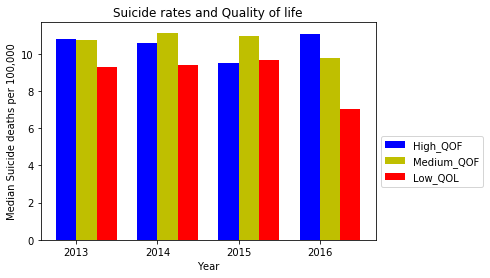

<Figure size 576x288 with 0 Axes>

In [5]:
#plot the graph
years=[2013,2014,2015,2016]
x_axis = np.arange(len(years))
bar_width=0.35

fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

width = 0.25         # the width of the bars
p1 = ax.bar(x_axis, QOF_combined_df[QOF_combined_df['Group1']=='1']['Both sexes (deaths per 100,000)'],color='b', width=width)
p2 = ax.bar(x_axis + width, QOF_combined_df[QOF_combined_df['Group2']=='2']['Both sexes (deaths per 100,000)'],color='y', width=width)
p3 = ax.bar(x_axis + width + width , QOF_combined_df[QOF_combined_df['Group3']=='3']['Both sexes (deaths per 100,000)'], color='r', width=width)

ax.set_title('Suicide rates and Quality of life')
ax.set_xticks(x_axis+ width / 2)
ax.set_xticklabels(('2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Median Suicide deaths per 100,000')


ax.legend((p1[0], p2[0],p3[0]), ('High_QOF', 'Medium_QOF','Low_QOL'),fontsize = 10,  bbox_to_anchor=(1.0, 0.5))

ax.autoscale_view()

plt.show()


In [6]:
#Conclusion



In [7]:
# Mercy codes ends here

In [8]:
# Ash codes starts here

#Ash just adding some notes
print("Ash starts here")
#Note 1
#Note 2
#Note 3

Ash starts here


In [9]:

#These four files are the same they contain year - just append them into a dataframe


In [10]:
#Ash ends here

In [11]:
# Onome codes starts here

In [22]:
# Purchasing Power to Suicide rates
all_countries = combined_QOF_df[['Country','Year','Both sexes (deaths per 100,000)','Cost of Living Index']]
all_countries_2013 = all_countries.loc[all_countries['Year'] == 2013]
all_countries_2013[['Cost_of_Living_rank']]=all_countries_2013[['Cost of Living Index']].rank(ascending=False)
all_countries_2013_grp1 = all_countries_2013.loc[all_countries_2013['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2013_grp2 = all_countries_2013[(all_countries_2013['Cost_of_Living_rank']>=21) & (all_countries_2013['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2013_grp3 = all_countries_2013.loc[(all_countries_2013['Cost_of_Living_rank']>=41) & (all_countries_2013['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 


suicide_rate_2013_grp1_median = all_countries_2013_grp1.groupby('Year').median()
suicide_rate_2013_grp1_median['Group1']=['1']
suicide_rate_2013_grp2_median=all_countries_2013_grp2.groupby('Year').median()
suicide_rate_2013_grp2_median['Group2']=['2']
suicide_rate_2013_grp3_median=all_countries_2013_grp3.groupby('Year').median()
suicide_rate_2013_grp3_median['Group3']=['3']
suicide_rate_2013_grp3_median


all_countries_2014 = all_countries.loc[all_countries['Year'] == 2014]
all_countries_2014[['Cost_of_Living_rank']]=all_countries_2014[['Cost of Living Index']].rank(ascending=False)
all_countries_2014_grp1 = all_countries_2014.loc[all_countries_2014['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2014_grp2 = all_countries_2014[(all_countries_2014['Cost_of_Living_rank']>=21) & (all_countries_2014['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2014_grp3 = all_countries_2014.loc[(all_countries_2014['Cost_of_Living_rank']>=41) & (all_countries_2014['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 

suicide_rate_2014_grp1_median = all_countries_2014_grp1.groupby('Year').median()
suicide_rate_2014_grp1_median['Group1']=['1']
suicide_rate_2014_grp2_median=all_countries_2014_grp2.groupby('Year').median()
suicide_rate_2014_grp2_median['Group2']=['2']
suicide_rate_2014_grp3_median=all_countries_2014_grp3.groupby('Year').median()
suicide_rate_2014_grp3_median['Group3']=['3']
suicide_rate_2014_grp3_median


all_countries_2015 = all_countries.loc[all_countries['Year'] == 2015]
all_countries_2015[['Cost_of_Living_rank']]=all_countries_2015[['Cost of Living Index']].rank(ascending=False)
all_countries_2015_grp1 = all_countries_2015.loc[all_countries_2015['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2015_grp2 = all_countries_2015[(all_countries_2015['Cost_of_Living_rank']>=21) & (all_countries_2015['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2015_grp3 = all_countries_2015.loc[(all_countries_2015['Cost_of_Living_rank']>=41) & (all_countries_2015['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 


suicide_rate_2015_grp1_median = all_countries_2015_grp1.groupby('Year').median()
suicide_rate_2015_grp1_median['Group1']=['1']
suicide_rate_2015_grp2_median=all_countries_2015_grp2.groupby('Year').median()
suicide_rate_2015_grp2_median['Group2']=['2']
suicide_rate_2015_grp3_median=all_countries_2015_grp3.groupby('Year').median()
suicide_rate_2015_grp3_median['Group3']=['3']
suicide_rate_2015_grp3_median


all_countries_2016 = all_countries.loc[all_countries['Year'] == 2016]
all_countries_2016[['Cost_of_Living_rank']]=all_countries_2016[['Cost of Living Index']].rank(ascending=False)
all_countries_2016_grp1 = all_countries_2016.loc[all_countries_2016['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2016_grp2 = all_countries_2016[(all_countries_2016['Cost_of_Living_rank']>=21) & (all_countries_2016['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2016_grp3 = all_countries_2016.loc[(all_countries_2016['Cost_of_Living_rank']>=41) & (all_countries_2016['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 


suicide_rate_2016_grp1_median = all_countries_2016_grp1.groupby('Year').median()
suicide_rate_2016_grp1_median['Group1']=['1']
suicide_rate_2016_grp2_median=all_countries_2016_grp2.groupby('Year').median()
suicide_rate_2016_grp2_median['Group2']=['2']
suicide_rate_2016_grp3_median=all_countries_2016_grp3.groupby('Year').median()
suicide_rate_2016_grp3_median['Group3']=['3']
suicide_rate_2016_grp3_median

PP_combined_df=pd.concat((suicide_rate_2013_grp1_median,suicide_rate_2013_grp2_median,suicide_rate_2013_grp3_median,
                   suicide_rate_2014_grp1_median,suicide_rate_2014_grp2_median,suicide_rate_2014_grp3_median,
                  suicide_rate_2015_grp1_median,suicide_rate_2015_grp2_median,suicide_rate_2015_grp3_median,
                  suicide_rate_2016_grp1_median,suicide_rate_2016_grp2_median,suicide_rate_2016_grp3_median), axis=0)
PP_combined_df=PP_combined_df.fillna(0)
PP_combined_df


,"Both sexes (deaths per 100,000)",Cost of Living Index,Cost_of_Living_rank,Group1,Group2,Group3
Year,,,,,,
2013,10.319870,103.575,10.5,1,0,0
2013,10.299735,72.860,30.5,0,2,0
2013,9.308304,53.720,50.5,0,0,3
2014,10.603629,100.160,10.5,1,0,0
2014,8.971284,69.170,30.5,0,2,0
2014,10.451128,50.360,50.5,0,0,3
2015,9.644410,90.885,10.5,1,0,0
2015,8.735091,67.140,30.5,0,2,0
2015,10.070996,51.940,50.5,0,0,3


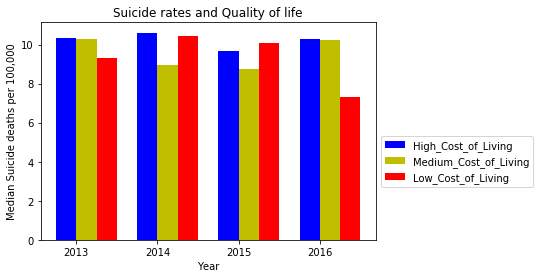

<Figure size 576x288 with 0 Axes>

In [24]:
#plot the graph
years=[2013,2014,2015,2016]
x_axis = np.arange(len(years))
bar_width=0.35

fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

width = 0.25         # the width of the bars
p1 = ax.bar(x_axis, PP_combined_df[PP_combined_df['Group1']=='1']['Both sexes (deaths per 100,000)'],color='b', width=width)
p2 = ax.bar(x_axis + width, PP_combined_df[PP_combined_df['Group2']=='2']['Both sexes (deaths per 100,000)'],color='y', width=width)
p3 = ax.bar(x_axis + width + width , PP_combined_df[PP_combined_df['Group3']=='3']['Both sexes (deaths per 100,000)'], color='r', width=width)

ax.set_title('Suicide rates and Quality of life')
ax.set_xticks(x_axis+ width / 2)
ax.set_xticklabels(('2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Median Suicide deaths per 100,000')


ax.legend((p1[0], p2[0],p3[0]), ('High_Cost_of_Living', 'Medium_Cost_of_Living','Low_Cost_of_Living'),fontsize = 10,  bbox_to_anchor=(1.0, 0.5))

ax.autoscale_view()

plt.show()

In [ ]:
# Onome codes ends here

In [ ]:
# Stacey starts here
#Hi it's me I finally did it!


In [ ]:
#Stacey ends here
